<a href="https://colab.research.google.com/github/rohitRDK21/Stock-Price-Prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#
import pandas as p 
import numpy as n
import matplotlib.pyplot as pl
data=p.read_csv("/content/Google_Stock_Price_Train.csv" )
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [84]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [86]:
dataset=data.drop(['Date'],axis=1)

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 49.3+ KB


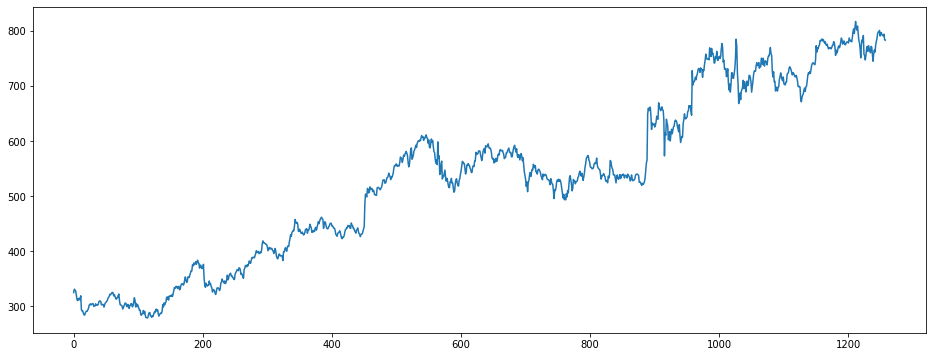

In [88]:
dataset["Open"].plot(figsize=(16,6))

In [89]:
dataset["Close"]=dataset["Close"].str.replace(',','').astype(float)

In [90]:
dataset["Volume"]=dataset["Volume"].str.replace(',','').astype(float)

In [91]:
dataset.rolling(7).mean().head(20)


,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,323.002857,325.392857,318.682857,643.132857,7.208100e+06
7,321.457143,322.882857,316.841429,638.037143,6.691514e+06
8,318.698571,319.801429,314.025714,631.870000,6.531857e+06
9,316.552857,317.524286,311.851429,627.534286,6.137929e+06


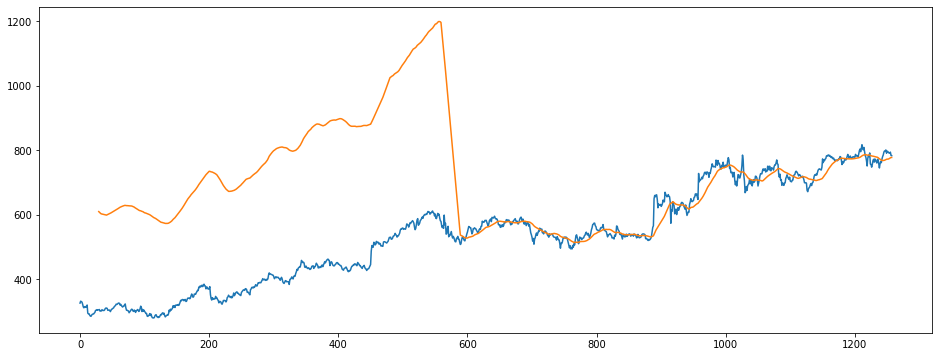

In [92]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()["Close"].plot()

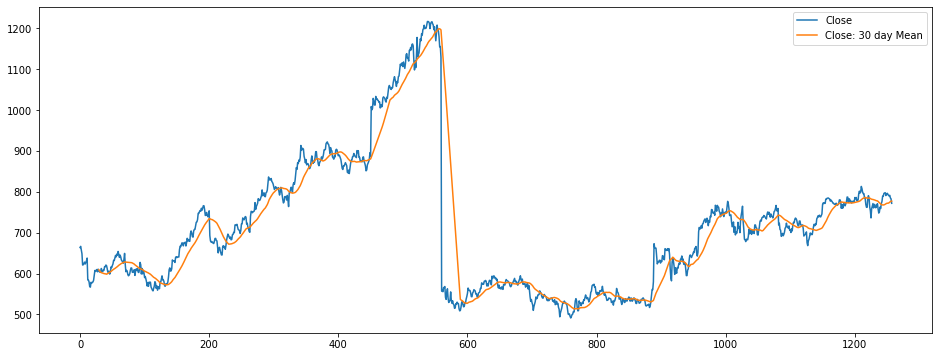

In [93]:
dataset['Close: 30 day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 day Mean']].plot(figsize=(16,6))

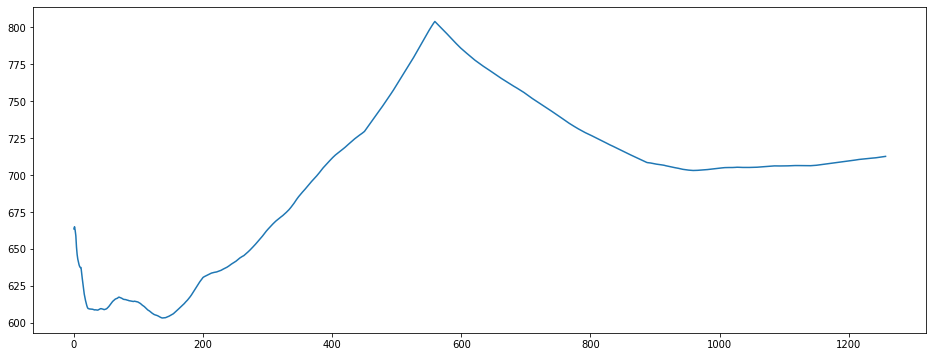

In [94]:
#specify a minimum no: of periods
dataset["Close"].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [95]:
training_set=dataset["Open"]
training_set=p.DataFrame(training_set)

In [96]:
trs=data.iloc[:,1:2].values
trs


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [97]:
#for scaling
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler(feature_range=(0,1))
tscr=sc.fit_transform(trs)
tscr


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [98]:
X_train=[]
Y_train=[]
for i in range(60,len(tscr)):
  X_train.append(tscr[i-60:i,0])
  Y_train.append(tscr[i,0])
X_train,Y_train=n.array(X_train),n.array(Y_train)

#reshaping
X_train=n.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras. layers import LSTM
from keras. layers import Dropout


In [100]:
#RNN initialising
regressor=Sequential()

In [101]:
#adding the first LSTM layer and some Dropout Regulations
regressor.add(LSTM(units=50, return_sequences =True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding a second LSTM layer and some Dropouts regulations
regressor.add(LSTM(units=50, return_sequences =True))
regressor.add(Dropout(0.2))

#adding a 3rd LSTM layer and some Dropouts regulations
regressor.add(LSTM(units=50, return_sequences =True))
regressor.add(Dropout(0.2))


#adding a 4rd LSTM layer and some Dropouts regulations
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#addung the output layer
regressor.add(Dense(units=1))


In [102]:
#compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
#fitting the training set to RNN
regressor.fit(X_train,Y_train, epochs=100, batch_size =32)

Epoch 1/100
38/38 [==============================] - 12s 125ms/step - loss: 0.0441
Epoch 2/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0035
Epoch 13/100

In [104]:
#part2 making the prediction and visualization
#geting the real stock price of 2017
dataset_test=p.read_csv("/content/Google_Stock_Price_Test.csv",index_col="Date",parse_dates=True)

In [105]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [106]:
dataset_test.head()


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [107]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [109]:
dataset_test["Volume"]=dataset_test["Volume"].str.replace(',','').astype(float)

In [111]:
test_set=dataset_test['Open']
test_set=p.DataFrame(test_set)

In [114]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [123]:
#getting the predicted stock price 
dataset_total=p.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)- 60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs) 
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=n.array(X_test) 
X_test=n.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

                
                         

In [124]:
predicted_stock_price=p.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


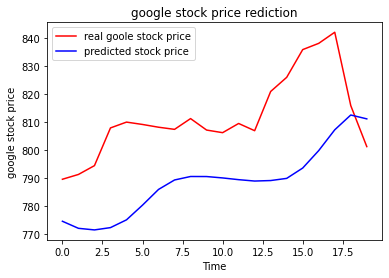

In [127]:

pl.plot(real_stock_price,color='red',label="real goole stock price")
pl.plot(predicted_stock_price,color="Blue", label="predicted stock price")
pl.title("google stock price rediction")
pl.xlabel('Time')
pl.ylabel("google stock price" )
pl.legend()
pl.show()